In [61]:
cd ..

C:\


In [62]:
cd Penn State\Projects\Lane Detection\Dataset

C:\Penn State\Projects\Lane Detection\Dataset


In [63]:
#cd drive/My Drive/MLND-Capstone-master/TM/lyft-udacity-challenge

In [64]:
import matplotlib.image as mpimg
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math
%matplotlib inline

# Import data into Pandas dataframe

In [65]:
print(os.getcwd())

C:\Penn State\Projects\Lane Detection\Dataset


In [66]:
train = []

data_folders = ['dataA', 'dataE', 'dataD']

i=0
for num, folder in enumerate(data_folders):
    i +=1
    print(i, len(train))
    for file in os.listdir(os.path.join(os.getcwd(), folder, 'CameraRGB')):
        train.append([os.path.join(os.getcwd(), folder, 'CameraRGB', file),
                     os.path.join(os.getcwd(), folder, 'CameraSeg', file)])

1 0
2 1000
3 2000


In [67]:
train = pd.DataFrame(train, columns=['Camera_Image', 'Segmented_Images'])
print(train.head())

                                        Camera_Image  \
0  C:\Penn State\Projects\Lane Detection\Dataset\...   
1  C:\Penn State\Projects\Lane Detection\Dataset\...   
2  C:\Penn State\Projects\Lane Detection\Dataset\...   
3  C:\Penn State\Projects\Lane Detection\Dataset\...   
4  C:\Penn State\Projects\Lane Detection\Dataset\...   

                                    Segmented_Images  
0  C:\Penn State\Projects\Lane Detection\Dataset\...  
1  C:\Penn State\Projects\Lane Detection\Dataset\...  
2  C:\Penn State\Projects\Lane Detection\Dataset\...  
3  C:\Penn State\Projects\Lane Detection\Dataset\...  
4  C:\Penn State\Projects\Lane Detection\Dataset\...  


In [68]:
len(train)

3000

In [73]:
print(train.iloc[2800][1])

C:\Penn State\Projects\Lane Detection\Dataset\dataD\CameraSeg\F64-16.png


In [74]:
print(train.iloc[2800][0])

C:\Penn State\Projects\Lane Detection\Dataset\dataD\CameraRGB\F64-16.png


# Remove Hood and Sky portion of image

In [75]:

def skyHoodRemove(image):
    image = image[120:480, :]
    return image


# Convert encoded label images into Colored Segmented Images for 3 class
Each pixel in image represent corresponding class. Actula Carla encoded image has 13 class but we are interested in 3 classes:
Cars, Roads, Roadlines. 
Carla semantic Segmentation:
[link text](https://carla.readthedocs.io/en/latest/cameras_and_sensors/#camera-semantic-segmentation)

In [107]:

def LabelConverter(image):
    x= np.zeros((360, 800, 3), dtype = float)
    image = skyHoodRemove(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if math.floor(max(image[i][j] )) == 7:
                x[i][j] =[0.,128.,0.]
            elif math.floor(max(image[i][j])) == 10:
                x[i][j] = [128.,0.,0.]
            elif math.floor(max(image[i][j])) == 6:
                x[i][j] = [0.,125.,125.]
    return x

# Data Visualisation

C:\Users\tgmte\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


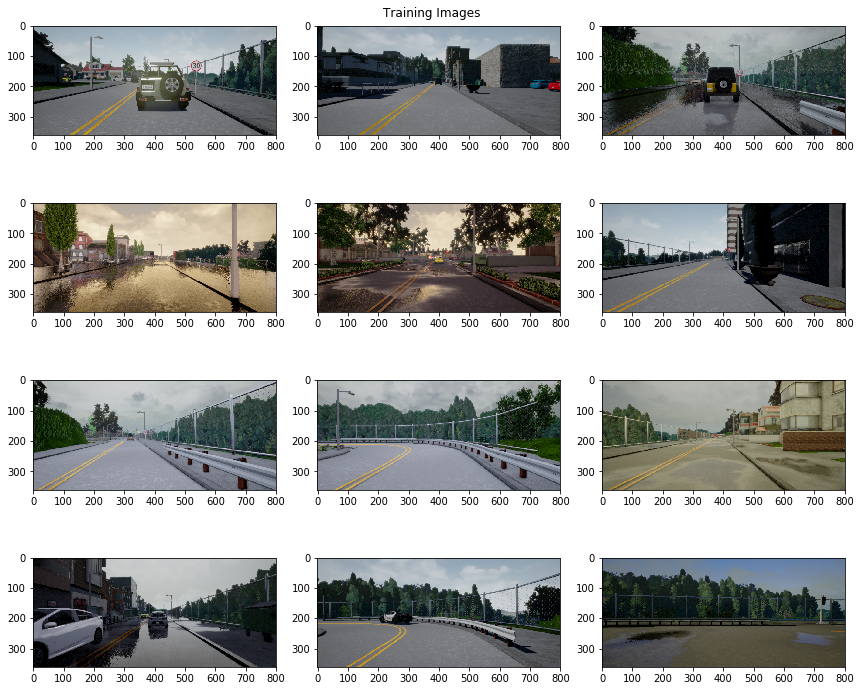

In [80]:
from random import randint

x = [randint(0, len(train)) for p in range(12)]
f, axs = plt.subplots(4,3, figsize=(12,10))
f.tight_layout()
f.suptitle('Training Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    ax.imshow(skyHoodRemove(mpimg.imread(train.iloc[x[i]][0])))

C:\Users\tgmte\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to 

Wall time: 13.3 s


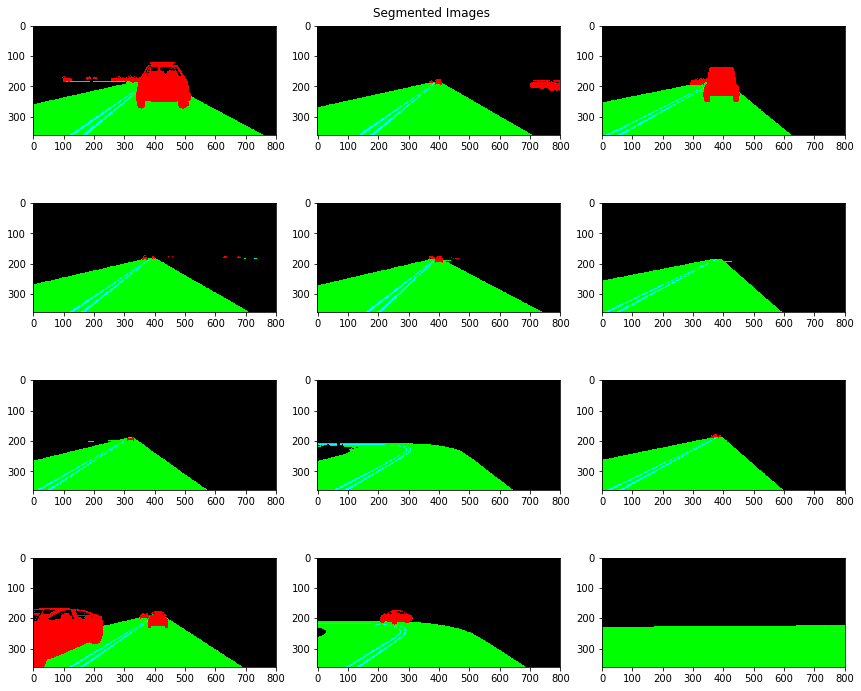

In [81]:
%%time
f, axs = plt.subplots(4,3, figsize=(12,10))
f.tight_layout()
f.suptitle('Segmented Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    ax.imshow(LabelConverter(cv2.imread(train.iloc[x[i]][1])))

In [91]:
mkdir RGB_data

# Data pre-processing and converting to numpy

In [99]:
def RGB_Preprocessing(train):
        
    colored = []
  
    for i in range(len(train)):
        color_img = cv2.imread(train.iloc[i][0])
        color_img = skyHoodRemove(color_img)
        cv2.imwrite(os.path.join(os.getcwd(),"RGB_data", str(i)+".png"), color_img)

In [100]:
%%time
Colored_train= RGB_Preprocessing(train)

Wall time: 1min 24s


In [31]:
print(Colored_train.shape)

(3000, 360, 800, 3)


In [13]:
"""%%time

import pickle
data = {}
data["color"] = Colored_train
pickle_out = open(os.getcwd() + '/rgb10.pickle', 'wb')
pickle.dump(data, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()"""

Wall time: 4min 1s


In [101]:
import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30  # memory use in GB
print('memory use:', memoryUse)

memory use: 0.23168563842773438


In [102]:
mkdir Segmented_data

In [113]:
def Seg_Processing(train):
    
    seg= []
    for i in range(len(train)):
        segmented_img = cv2.imread(train.iloc[i][1])
        segmented_img = LabelConverter(segmented_img)
        cv2.imwrite(os.path.join(os.getcwd(),"Segmented_data", str(i)+".png"), segmented_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


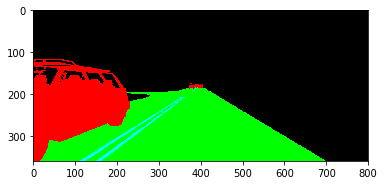

In [110]:
segmented_img = cv2.imread(train.iloc[0][1])
segmented_img = LabelConverter(segmented_img)
cv2.imwrite(os.path.join(os.getcwd(),"Segmented_data", str(0)+".png"), segmented_img)
plt.imshow(segmented_img)

In [114]:
%%time
Seg_train= Seg_Processing(train)

Wall time: 54min 12s
